In [5]:
# Add Matplotlib 
%matplotlib inline
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [7]:
# Read the city and ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Technical Analysis Deliverable 1: A Summary DataFrame

In [8]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [9]:
# Creating data frame
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
avg_fare_ride = total_fares / total_rides
avg_fare_driver = total_fares / total_drivers

In [10]:
ride_driver_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": avg_fare_ride,
    "Average Fare per Driver": avg_fare_driver
})
ride_driver_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
# Delete index
ride_driver_summary_df.index.name = None

In [12]:
# Formatting
ride_driver_summary_df["Total Fares"] = ride_driver_summary_df["Total Fares"].map("${:,.2f}".format)
ride_driver_summary_df["Average Fare per Ride"] = ride_driver_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
ride_driver_summary_df["Average Fare per Driver"] = ride_driver_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
ride_driver_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


# Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

In [13]:
# Renaming columns
cleaned_pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
cleaned_pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Checking index is datetime data type using info()
cleaned_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Date         2375 non-null   object 
 2   Fare         2375 non-null   float64
 3   Ride Id      2375 non-null   int64  
 4   No. Drivers  2375 non-null   int64  
 5   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [15]:
# Convert index to datetime data type
cleaned_pyber_data_df["Date1"] = pd.to_datetime(cleaned_pyber_data_df["Date"])

In [16]:
cleaned_pyber_data_df = cleaned_pyber_data_df.drop(columns=["Date"])
cleaned_pyber_data_df.rename(columns={"Date1":"Date"}, inplace=True)
cleaned_pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type,Date
0,Lake Jonathanshire,13.83,5739410935873,5,Urban,2019-01-14 10:14:22
1,South Michelleport,30.24,2343912425577,72,Urban,2019-03-04 18:24:09
2,Port Samanthamouth,33.44,2005065760003,57,Urban,2019-02-24 04:29:00
3,Rodneyfort,23.44,5149245426178,34,Urban,2019-02-10 23:22:03
4,South Jack,34.58,3908451377344,46,Urban,2019-03-06 04:28:35


In [17]:
# Setting the index
cleaned_pyber_data_df = cleaned_pyber_data_df.set_index('Date')
cleaned_pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [18]:
# Create new data frame using .copy()
new_pyber_data_df = cleaned_pyber_data_df[['City Type', 'Fare']].copy()
new_pyber_data_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [19]:
# Total fare by city and date
total_fares = new_pyber_data_df.groupby(["City Type", "Date"]).sum()["Fare"]
total_fares

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [20]:
# Convert groupby series to data frame
total_fares_df = pd.DataFrame(total_fares)
total_fares_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [21]:
# Reset Index
total_fares_df.reset_index(inplace=True)
total_fares_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [28]:
# Pivot dataframe
total_fare_pivot_df = total_fares_df.pivot(index ="Date", columns = "City Type")['Fare']
total_fare_pivot_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [29]:
# Use loc to create DataFrame with range 2019-01-01':'2019-04-28'
jan_apr_fare_df = total_fare_pivot_df.loc['2019-01-01':'2019-04-28']
jan_apr_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [30]:
# Resample data frame
jan_apr_fare_df = jan_apr_fare_df.resample('W').sum()
jan_apr_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [31]:
# Plotting the data frame
%matplotlib notebook

In [32]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

<IPython.core.display.Javascript object>


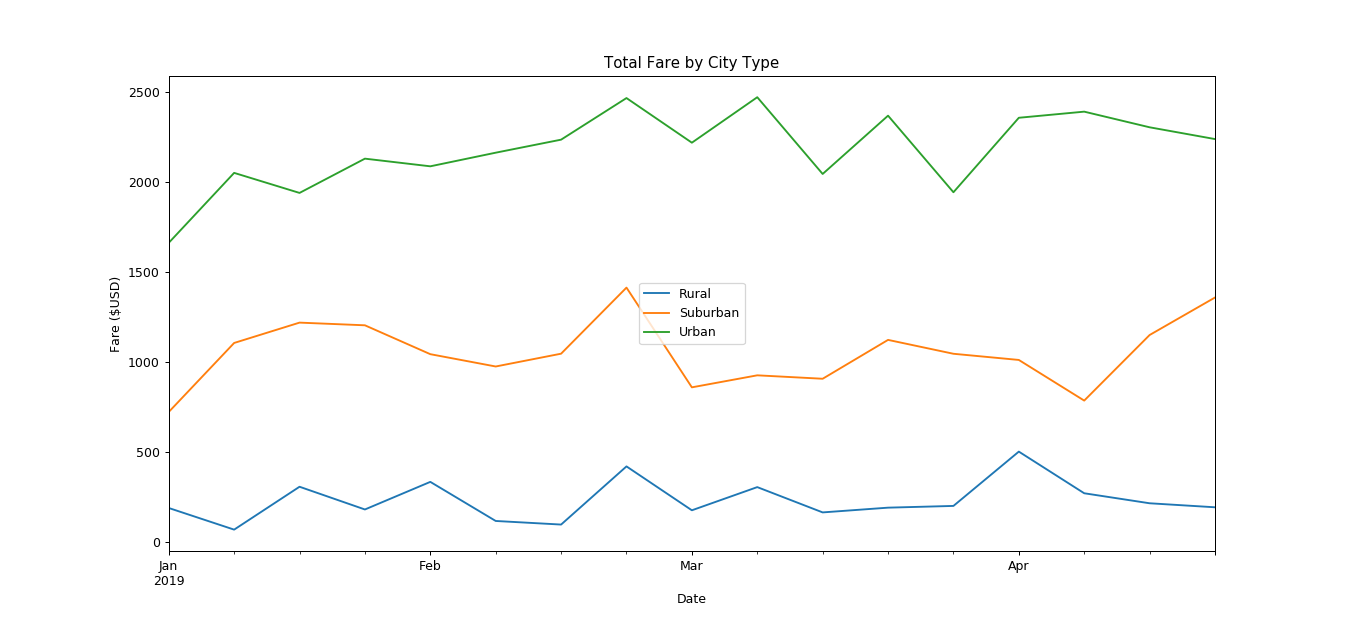

In [34]:
multi_plot = jan_apr_fare_df.plot(figsize=(15, 7))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.legend(loc="center")
plt.savefig('Resources/TotalFare.png')
plt.show()